Today we're going to explore the `numpy`, `scipy`, and `matplotlib` packages, which are essential parts of the
Python scientist's toolkit.

First, why do we need this?  What's wrong with Python's built-in functionality for scientific work?

Two main reasons:
* functionality -- the built-in libraries don't have the things we need
* speed -- Python has a lot of processing overhead, and for larger data sets this starts to hurt

Let's look at functionality first.

To find out about Python's built-in libraries, check out this page:
https://docs.python.org/3/library/index.html

Getting to know this standard library is a big part of learning to become proficient in Python.  Don't worry that there is so much -- you'll never touch most of it!

As you might hope, there's a `math` library,
https://docs.python.org/3/library/math.html
which defines most of the low-level mathematical functions.

First, we need to learn how to `import` things from a library.

If we just try to use the `sin` function, it doesn't exist:

In [3]:
sin(1.0)

NameError: name 'sin' is not defined

There are a few different ways we can `import` the `sin` function:

In [4]:
import math

In [5]:
math.sin(1.0)

0.8414709848078965

Which *works*, but it means that you have to write `math.sin` any time you want to compute the sine in your code,
which is kind of awkward.

You can also go:

In [6]:
from math import sin

In [7]:
sin(1.0)

0.8414709848078965

Which imports the symbol `sin` from the `math` library.  You can `import` multiple things at once:

In [8]:
from math import sin, cos, tan, pi

In [13]:
# "pi" is a plain old floating-point number:
pi

3.141592653589793

In [14]:
type(pi)

float

In [22]:
# What type is the `cos` function?
cos

<function math.cos(x, /)>

In [21]:
type(cos)

builtin_function_or_method

It's also possible to import *everything* from a library, by going

`from math import *`

but usually it's considered better form to import just the things you need by name, because then it's easier
to figure out where things are coming from.

If you look through the documentation on the `math` package, you'll see that it provides the basic functions,
but what about *vectors* and *matrices* and *linear algebra* and *optimization*?  Those don't exist in the
built-in library.

`numpy` to the rescue!

The documentation for the `numpy` and `scipy` packages (both developed by the SciPy organization)
is available here:
https://docs.scipy.org/doc/

In particular, you'll spend a lot of time with the *reference manual*,
https://docs.scipy.org/doc/numpy/reference/index.html



Let's start by importing it.  A very strong convention is to import `numpy` as `np`:

In [23]:
import numpy as np

In [24]:
np.sin(1.0)

0.8414709848078965

What can `numpy` do for us?  Well, one extremely handy thing is that you can perform most operations on
*vectors* or *matrices* of values the same way you would for scalars.

This uses the `np.array` data type.  You can build an `array` from a list:

In [25]:
v = np.array([1., 2., 3, 4, 5])

In [31]:
v

array([1., 2., 3., 4., 5.])

In [32]:
type(v)

numpy.ndarray

In [33]:
v.dtype

dtype('float64')

Note that every element in `v` became data type `float64`, even though I created it from a list with some floats and some integers.  Values in numpy arrays are all the same type.

Other popular ways of creating arrays include `arange`, `linspace`, and `logspace`:

In [37]:
t = np.linspace(0, 2. * np.pi, 20)

In [38]:
t

array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
       1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
       3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
       4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531])

So `linspace` can be used to create linearly spaced values between a `start` and a `stop` (here, 20 values between 0 and 2 pi, inclusive).

Conveniently, if you run a function on this array, it will operate on each element.

In [39]:
np.sin(t)

array([ 0.00000000e+00,  3.24699469e-01,  6.14212713e-01,  8.37166478e-01,
        9.69400266e-01,  9.96584493e-01,  9.15773327e-01,  7.35723911e-01,
        4.75947393e-01,  1.64594590e-01, -1.64594590e-01, -4.75947393e-01,
       -7.35723911e-01, -9.15773327e-01, -9.96584493e-01, -9.69400266e-01,
       -8.37166478e-01, -6.14212713e-01, -3.24699469e-01, -2.44929360e-16])

Note that you have to write `np.sin`.  `math.sin` won't know how to deal with an array:

In [42]:
math.sin(t)

TypeError: only size-1 arrays can be converted to Python scalars

The `arange` function creates a numpy array that counts up to the given value.  Notice that the data type of the array will depend on the type you use for that value:

In [45]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
np.arange(10.)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Two more handy array-creating functions are `zeros` and `ones`, which create arrays that are full of the value zero, or one.

In [47]:
z = np.zeros(4)

In [48]:
z

array([0., 0., 0., 0.])

In [49]:
z.dtype

dtype('float64')

We can create zeros with a given data type:

In [50]:
iz = np.zeros(4, np.uint8)

In [51]:
iz

array([0, 0, 0, 0], dtype=uint8)

(`uint8` is short for "unsigned int, 8 bits" -- so can only hold integers from 0 to 255!)

In [52]:
oo = np.ones(3, np.complex)

In [53]:
oo

array([1.+0.j, 1.+0.j, 1.+0.j])

Now, let's look at creating 2-d arrays:

In [62]:
twod = np.ones((4,2))

In [63]:
twod

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Notice that I specified the size of the array as `(4,2)` -- 4 rows by 2 columns.

I can run mathematical functions element-wise on a 2-d array too:

In [64]:
np.cos(twod)

array([[0.54030231, 0.54030231],
       [0.54030231, 0.54030231],
       [0.54030231, 0.54030231],
       [0.54030231, 0.54030231]])

I can create 2-d arrays "by hand", using nested lists:

In [65]:
by_hand = np.array([ [1,2], [3,4], [5,6] ])
by_hand

array([[1, 2],
       [3, 4],
       [5, 6]])

Now, what about linear algebra?  Can I create a vector and multiply it by my matrix?

In [66]:
v = np.array([7,8])

In [67]:
twod, v

(array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]), array([7, 8]))

In [68]:
twod * v

array([[7., 8.],
       [7., 8.],
       [7., 8.],
       [7., 8.]])

Yikes!  That's not what I was expecting!  What did `numpy` do??

Turns out, `numpy` uses what it calls "broadcasting" to run operations element-by-element, as long as the arrays
have the same dimensions, *after growing some dimensions*.  It takes a bit of getting used to!  But the key is that `numpy`'s operations are all element-wise.

There's a `.T` operator that takes the transpose of an array:

In [71]:
twod.T

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

And then we can see what happens when broadcasting doesn't work:

In [73]:
twod.T * v

ValueError: operands could not be broadcast together with shapes (2,4) (2,) 

In [77]:
print(twod.shape)
print(twod.T.shape)
print(v.shape)

(4, 2)
(2, 4)
(2,)


A very important concept in `numpy` code is *indexing*.

List built-in Python lists, 1-d numpy arrays use zero-based indices:

In [78]:
a_list = [42, 19, 37]
arr = np.array([42, 19, 37])

In [80]:
print(a_list[1])
print(arr[1])

19
19


For 2-d arrays, you list off the indices.

In [82]:
twod = 10 * np.arange(6).reshape((2,3))
twod

array([[ 0, 10, 20],
       [30, 40, 50]])

In [83]:
twod[1,2]

50

By the way, multi-dimensional arrays work just like you'd expect them to.

In [84]:
bigd = np.arange(12).reshape((2,3,1,2))
bigd

array([[[[ 0,  1]],

        [[ 2,  3]],

        [[ 4,  5]]],


       [[[ 6,  7]],

        [[ 8,  9]],

        [[10, 11]]]])

In [85]:
bigd[0]

array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]])

In [86]:
bigd[0].shape

(3, 1, 2)

You can grab a *range* of indices from an array using the colon `:` operator, and the result will be a one-d or two-d array depending on how you write it.

In [88]:
v = 10 * np.arange(10)
v

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [89]:
v[2:5]

array([20, 30, 40])

In [91]:
a = 10 * np.arange(12).reshape((4,-1))
a

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

In [92]:
a[1:3, 0:2]

array([[30, 40],
       [60, 70]])

In [95]:
a[1:3, 0]

array([30, 60])

There are some handy shortcuts: `-1` refers to the *last* element in the array, `-2` the second-last, and so on.
If you wanted all elements except for the last row and column:

In [96]:
a

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

In [97]:
a[0:-1, 0:-1]

array([[ 0, 10],
       [30, 40],
       [60, 70]])

And if your colon operator starts with zero, you can omit it;

In [98]:
a[:-1, :-1]

array([[ 0, 10],
       [30, 40],
       [60, 70]])

Similarly, if you want to grab from an element to the end, you can omit specifying the ending index:

In [99]:
a

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

In [101]:
a[2:, 1:]

array([[ 70,  80],
       [100, 110]])

Now for two more fancy indexing tricks.  The colon on its own means "everything in this axis".  And there is a fancy indexer called `np.newaxis` that *expands* the dimensionality of the array.

First the colon:

In [102]:
a

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

Let's say I want only the second row:

In [103]:
a[1]

array([30, 40, 50])

What about if I want the second column?

In [105]:
a[:,1]

array([ 10,  40,  70, 100])

What if I wanted the second column, but I still want it to be a 2-d array?  I can use `np.newaxis` for that:

In [107]:
column = a[:,1]
twod = column[np.newaxis, :]
twod

array([[ 10,  40,  70, 100]])

When I put `np.newaxis` in as an index, it says "expand the dimensionality of the array so that a new axis exists here".

In addition to indexing using integers, you can index using *booleans*.  This feature is really handy, but it can also be confusing.

Let's say I want to compute the `sin` of a bunch of values, but only where the `cos` is positive.

In [110]:
times = np.linspace(0, 2.*np.pi, 10)
cc = np.cos(times)
ss = np.sin(times)

Let's look at the cosine values:

In [111]:
cc

array([ 1.        ,  0.76604444,  0.17364818, -0.5       , -0.93969262,
       -0.93969262, -0.5       ,  0.17364818,  0.76604444,  1.        ])

If you compare that array to zero, you get an *elementwise* comparison:

In [115]:
cc >= 0

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

If you use that array to *index* another array (say, the sines you computed above), it pulls out *only the array elements containing `True`.

In [116]:
ss[cc >= 0]

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

Notice that the length of that indexed array is shorter!

In [121]:
print(len(ss))
print(len(cc >= 0))
print(len(ss[cc >= 0]))

10
10
6


Now, aside from the basic `array` data type, `numpy` provides a big toolbox of different kinds of routines.

Parts *I* use all the time include:
* np.random -- generating random numbers
* np.fft -- all things Fast Fourier Transform
* np.linalg -- linear algebra

I promised I would show you `scipy` and `matplotlib` also!  A very quick tour:

In [122]:
import scipy

The scipy docs are here
https://docs.scipy.org/doc/scipy/reference/

Packages that *I* use all the time include
* scipy.ndimage (images)
* scipy.optimize (optimization routines)
* scipy.linalg.sparse (sparse linear algebra)
* scipy.stats (statistical distributions)

But before we get into that, let's look at `matplotlib`.  Since `matplotlib` can be used to generate in-line plots in a notebook, there is a magic incantation:

In [123]:
%matplotlib inline

In [124]:
import pylab as plt

Additional magic: by default, the inline plots are a bit small.  We can make the default bigger with this incantation:

In [125]:
plt.rcParams['figure.figsize'] = [10, 6]

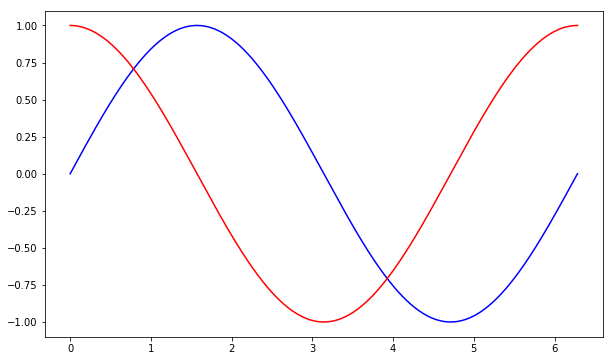

In [127]:
t = np.linspace(0, 2.*pi, 500)
plt.plot(t, np.sin(t), 'b-')
plt.plot(t, np.cos(t), 'r-');

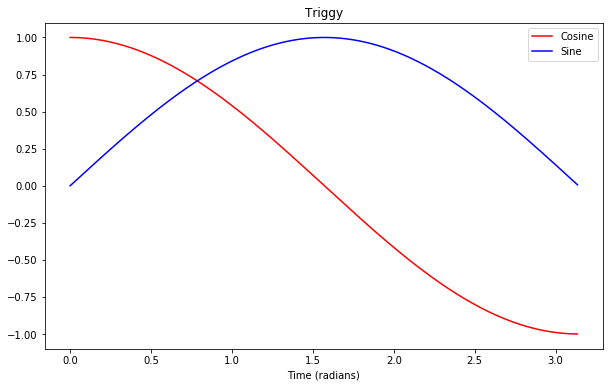

In [135]:
cc = np.cos(t)
ss = np.sin(t)
subset = (ss >= 0)
plt.plot(t[subset], cc[subset], 'r-', label='Cosine')
plt.plot(t[subset], ss[subset], 'b-', label='Sine');
plt.xlabel('Time (radians)')
plt.title('Triggy')
plt.legend();
plt.savefig('1.png')

Let's use some stuff from `scipy` and `matplotlib`:

In [137]:
# generate some chi-squared-distributed random values (with 3 degrees of freedom)
import scipy.stats
chi2 = scipy.stats.chi2(3)

In [151]:
N = 10000
rr = chi2.rvs(size=N)

In [152]:
rr

array([1.7830414 , 1.18161449, 0.64111111, ..., 2.12582432, 2.09215254,
       5.46043749])

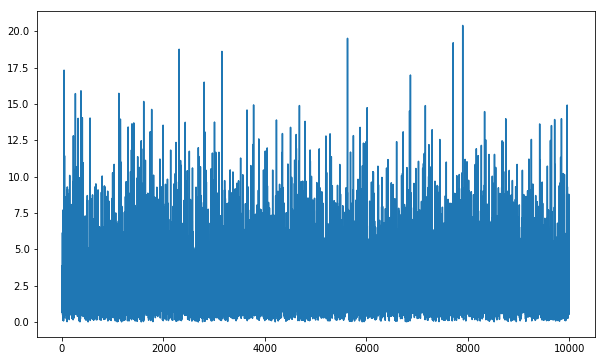

In [153]:
plt.plot(rr);

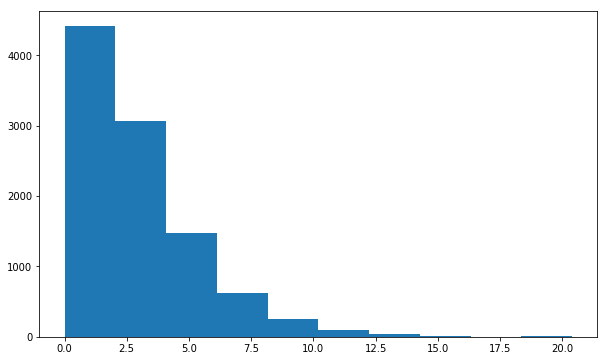

In [154]:
plt.hist(rr);

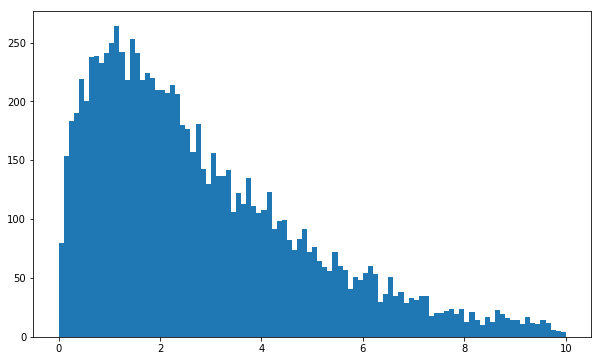

In [155]:
n,b,p = plt.hist(rr, range=(0,10), bins=100);

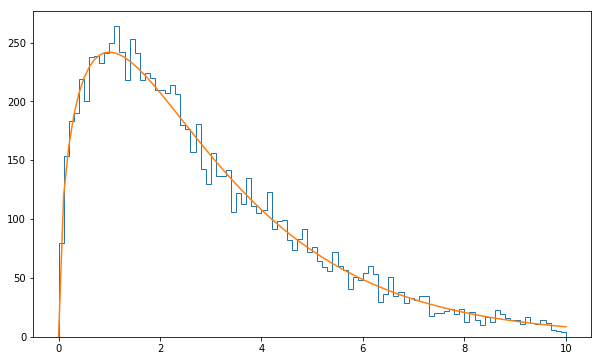

In [158]:
n,b,p = plt.hist(rr, range=(0,10), bins=100, histtype='step');
db = b[1]-b[0]
plt.plot(b, chi2.pdf(b) * db * N);